<a href="https://colab.research.google.com/github/aaaksenova/wsi_bach_thesis/blob/change/RUSSE_variances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RUSSE-2018

In [12]:
! git clone https://github.com/nlpub/russe-wsi-kit.git

Cloning into 'russe-wsi-kit'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 148 (delta 4), reused 22 (delta 4), pack-reused 116
Receiving objects: 100% (148/148), 3.83 MiB | 8.27 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [13]:
! cd russe-wsi-kit/

In [14]:
! pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [15]:
! python3 russe-wsi-kit/evaluate.py russe-wsi-kit/data/main/wiki-wiki/train.baseline-adagram.csv

word	ari	count
бор	0.591175	56
замок	0.495386	138
лук	0.637076	110
суда	0.005465	135
	0.392449	439


In [16]:
! pip install ruwordnet

In [17]:
! ruwordnet download

downloading a ruwordnet model from https://github.com/avidale/python-ruwordnet/releases/download/0.0.2/ruwordnet.db


In [18]:
from ruwordnet import RuWordNet
import pandas as pd

wn = RuWordNet()

In [21]:
def ruwordnet_comparison(filepath):
    '''
    Function processes the given dataframe and 
    returns the number of senses for each word
    '''

    df = pd.read_csv(filepath, sep='\t')
    grouped_df = df. groupby('word')
    grouped_df = grouped_df.agg({'gold_sense_id': "nunique"})
    grouped_df = grouped_df.reset_index()
    grouped_df['ruwordnet_num_senses'] = grouped_df['word'].apply(lambda x: len(wn.get_senses(x)))
    grouped_df['deviation'] = - grouped_df['gold_sense_id'] + grouped_df['ruwordnet_num_senses']
    
    return grouped_df

In [22]:
df_wiki_train = ruwordnet_comparison('/content/russe-wsi-kit/data/main/wiki-wiki/train.csv')
df_wiki_train

word  gold_sense_id  ruwordnet_num_senses  deviation
0    бор              2                     2          0
1  замок              2                     2          0
2    лук              2                     3          1
3   суда              2                     0         -2

In [23]:
df_wiki_train.deviation.median()

0.0

In [24]:
df_wiki_test = ruwordnet_comparison('/content/russe-wsi-kit/data/main/wiki-wiki/test.csv')
df_wiki_test

word  gold_sense_id  ruwordnet_num_senses  deviation
0   банка              0                     2          2
1   белка              0                     1          1
2     бит              0                     1          1
3    горе              0                     2          2
4  гранат              0                     3          3
5    граф              0                     2          2
6     душ              0                     2          2

In [25]:
df_bts_train = ruwordnet_comparison('/content/russe-wsi-kit/data/main/bts-rnc/train.csv')
df_bts_train

word  gold_sense_id  ruwordnet_num_senses  deviation
0      балка              2                     2          0
1        вид              3                     5          2
2       винт              4                     3         -1
3       горн              3                     2         -1
4       губа              3                     3          0
5       жаба              4                     1         -3
6     клетка              6                     4         -2
7      крыло              8                     6         -2
8     купюра              2                     2          0
9     курица              2                     2          0
10     лавка              2                     2          0
11     лайка              2                     2          0
12       лев              4                     1         -3
13      лира              2                     1         -1
14      мина              3                     3          0
15    мишень              2                     2          0
16      обед              4                     3         -1
17     оклад              3                     2         -1
18    опушка              2                     3          1
19     полис              2                     2          0
20      пост              5                     6          1
21     поток              2                     4          2
22   проказа              2                     2          0
23  пропасть              4                     4          0
24  проспект              4                     3         -1
25     пытка              2                     2          0
26      рысь              2                     2          0
27     среда              4                     4          0
28     хвост              4                     3         -1
29     штамп              4                     4          0

In [26]:
df_bts_train.deviation.median()

0.0

In [27]:
df_bts_test = ruwordnet_comparison('/content/russe-wsi-kit/data/main/bts-rnc/test.csv')
df_bts_test

word  gold_sense_id  ruwordnet_num_senses  deviation
0       акция              0                     2          2
1        баба              0                     0          0
2       байка              0                     2          2
3         бум              0                     1          1
4       бычок              0                     1          1
5         вал              0                     3          3
6         газ              0                     4          4
7    гвоздика              0                     2          2
8   гипербола              0                     0          0
9        град              0                     2          2
10   гусеница              0                     2          2
11      дождь              0                     2          2
12     домино              0                     1          1
13      забой              0                     2          2
14       икра              0                     3          3
15    кабачок              0                     2          2
16      капот              0                     2          2
17     карьер              0                     2          2
18     кличка              0                     2          2
19       ключ              0                     6          6
20        кок              0                     0          0
21     кольцо              0                     3          3
22    концерт              0                     3          3
23    котелок              0                     2          2
24      крона              0                     4          4
25       круп              0                     0          0
26      кулак              0                     2          2
27      лейка              0                     1          1
28        лук              0                     3          3
29   мандарин              0                     2          2
30      ножка              0                     4          4
31      опора              0                     5          5
32     патрон              0                     2          2
33     печать              0                     6          6
34        пол              0                     2          2
35      полоз              0                     2          2
36     почерк              0                     2          2
37     пробка              0                     5          5
38        рак              0                     3          3
39        рок              0                     2          2
40       свет              0                     4          4
41     секрет              0                     5          5
42       скат              0                     2          2
43       слог              0                     2          2
44       стан              0                     3          3
45     стопка              0                     2          2
46        таз              0                     2          2
47      такса              0                     2          2
48     тюрьма              0                     2          2
49        шах              0                     2          2
50      шашка              0                     5          5

In [28]:
df_active_train = ruwordnet_comparison('/content/russe-wsi-kit/data/main/active-dict/train.csv')
df_active_train

word  gold_sense_id  ruwordnet_num_senses  deviation
0               дар              3                     2         -1
1         двигатель              2                     2          0
2           двойник              4                     1         -3
3            дворец              2                     1         -1
4           девятка              9                     0         -9
..              ...            ...                   ...        ...
80  злоупотребление              2                     2          0
81             знак              7                     3         -4
82            знамя              2                     1         -1
83         значение              4                     3         -1
84             зонт              2                     1         -1

[85 rows x 4 columns]

In [29]:
df_active_train.deviation.median()

-1.0

In [30]:
df_active_test = ruwordnet_comparison('/content/russe-wsi-kit/data/main/active-dict/test.csv')
df_active_test

word  gold_sense_id  ruwordnet_num_senses  deviation
0    давление              0                     4          4
1        дама              0                     2          2
2      данные              0                     1          1
3        дата              0                     2          2
4      двойка              0                     1          1
..        ...            ...                   ...        ...
163      зона              0                     1          1
164    зонтик              0                     2          2
165  зоология              0                     1          1
166      зубр              0                     1          1
167       зуд              0                     2          2

[168 rows x 4 columns]

In [31]:
! pip install transformers

     |████████████████████████████████| 3.1 MB 5.1 MB/s 
     |████████████████████████████████| 61 kB 337 kB/s 
     |████████████████████████████████| 3.3 MB 46.3 MB/s 
     |████████████████████████████████| 895 kB 72.4 MB/s 
     |████████████████████████████████| 596 kB 43.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Variance estimator

In [32]:
from transformers import AutoTokenizer, AutoModel, BertConfig

config = BertConfig.from_pretrained("cointegrated/rubert-tiny", output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny", config=config)

Downloading:   0%|          | 0.00/632 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/235k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/457k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/45.5M [00:00<?, ?B/s]

Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [63]:
def mask_sent(x):
    '''
    Replaces the first instance of target word by [MASK]
    using the given char positions
    '''
    try:
        start_id = x.positions.split(',')[0].split('-')[0].strip()
        end_id = x.positions.split(',')[0].split('-')[1].strip()
        masked = x.context.replace(x.context[int(start_id) : int(end_id)], '[MASK]', 1)
        return masked
    except:
        return x

In [65]:
def BERT_MASK(masked, model, tokenizer):
    '''
    Function extracts masked words vectors 
    as outputs from the last layers
    '''

    embs = []
    for line in tqdm(masked, total=len(masked)):
        try:
            input = tokenizer.encode(line, return_tensors="pt")
            mask_token_index = torch.where(input == tokenizer.mask_token_id)
         
            token_logits = model(input, return_dict=True)["hidden_states"]
            mask_token_logits = token_logits[-1].squeeze()[mask_token_index, :][0]
            embs.append(mask_token_logits.detach().numpy())
        except Exception as e:
            print(line)
            print(e)
            
    return np.array(embs)

In [38]:
from tqdm.auto import tqdm
import torch
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestCentroid
import numpy as np

In [39]:
def variance_counter(df):
    '''Function calculates the variance for each word vectors distribution 
    extracted from the dataset'''

    word_dict = {}
    y = []
    print('Dataset includes {} words'.format(len(df.word.unique())))
    # Collect embeddings and cluster tags
    for i, word in enumerate(df.word.unique()):
        word_dict[word] = BERT_MASK(df[df.word == word]['masked_sent'], model, tokenizer)
        y += [i] * word_dict[word].shape[0]
    # Get cluster centroids by cosine distance estimation
    clf = NearestCentroid(metric='cosine')
    centroids = clf.fit(np.concatenate(tuple(word_dict.values())), y).centroids_
    # Count variances
    variances = {word : np.sum(cosine_similarity(word_dict[word], centroids[i].reshape(1, -1)) ** 2) / word_dict[word].shape[0] \
                 for i, word in enumerate(word_dict.keys())}
                 
    return variances

In [44]:
df = pd.read_csv('/content/russe-wsi-kit/data/main/wiki-wiki/train.csv', sep='\t')

In [45]:
df

context_id  ...                                            context
0             1  ...  замок владимира мономаха в любече . многочисле...
1             2  ...  шильонский замок замок шильйон ( ) , известный...
2             3  ...  проведения архитектурно - археологических рабо...
3             4  ...  топи с . , л . белокуров легенда о завещании м...
4             5  ...  великий князь литовский гедимин после успешной...
..          ...  ...                                                ...
434         435  ...  ленточный бор ле́нточные бо́ры — сосновые трав...
435         436  ...  в окрестностях барнаула , составляет —  км . н...
436         437  ...  также в сосновом бору открыта секция биатлона ...
437         438  ...  экспресс банк , мособлбанк , внешпромбанк , ба...
438         439  ...  каштакский бор каштакский бор — бор , находящи...

[439 rows x 6 columns]

In [48]:
df['masked_sent'] = df.apply(lambda x: mask_sent(x), axis=1)

In [49]:
variance_counter(df)

Dataset includes 4 words


  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_nearest_centroid.py:165: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  "Averaging for metrics other than "


{'бор': 0.7793547830767188,
 'замок': 0.8245890997133744,
 'лук': 0.8057950541674311,
 'суда': 0.7186626661862388}

In [50]:
! pip install ruword_frequency

In [51]:
from ruword_frequency import Frequency
freq = Frequency()
freq.load()

freq.ipm('привет')

45.22614669799805

In [67]:
def collect_data(filename):
    '''
    The function transforms RUSSE dataset into list of tuples
    where for each word its frequency, vector variation and number of senses are calculated
    '''

    df = pd.read_csv(filename, sep='\t')
    df['masked_sent'] = df.apply(lambda x: mask_sent(x), axis=1)
    var_dict = variance_counter(df)
    freq_dict = {word: freq.ipm(word) for word in var_dict.keys()}
    num_sense_dict = {word: len(wn.get_senses(word)) for word in var_dict.keys()}
    data_list = []
    for word in var_dict.keys():
        data_list.append((word, var_dict[word], freq_dict[word], num_sense_dict[word]))
    return data_list

In [68]:
paths = ['/content/russe-wsi-kit/data/main/active-dict/test.csv', '/content/russe-wsi-kit/data/main/active-dict/train.csv',
         '/content/russe-wsi-kit/data/main/bts-rnc/test.csv', '/content/russe-wsi-kit/data/main/bts-rnc/train.csv',
         '/content/russe-wsi-kit/data/main/wiki-wiki/test.csv', '/content/russe-wsi-kit/data/main/wiki-wiki/train.csv']

In [69]:
full_data = []
for path in tqdm(paths):
    full_data.extend(collect_data(path))
df_features = pd.DataFrame(full_data, columns=['words', 'variation', 'frequency', 'num_senses'])

  0%|          | 0/6 [00:00<?, ?it/s]

Dataset includes 168 words


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

context_id                                            2121
word                                                  дама
gold_sense_id                                          NaN
predict_sense_id                                       NaN
positions                                              NaN
context             Екатерина тузом ловко накрыла трефовую
Name: 47, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

context_id                                                       2219
word                                                           двойка
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             Именно эта ничья сохранила главную интригу чем...
Name: 145, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

context_id                          2279
word                               девка
gold_sense_id                        NaN
predict_sense_id                     NaN
positions                            NaN
context             девочка; развратница
Name: 205, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id            2283
word                 девка
gold_sense_id          NaN
predict_sense_id       NaN
positions              NaN
context             шалава
Name: 209, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id               2290
word                    девка
gold_sense_id             NaN
predict_sense_id          NaN
positions                 NaN
context             потаскуха
Name: 216, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id           2295
word                девка
gold_sense_id         NaN
p

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

context_id                          2646
word                                день
gold_sense_id                        NaN
predict_sense_id                     NaN
positions                            NaN
context             25 февраля 1917 года
Name: 572, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

context_id                                                       2755
word                                                           десерт
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             Слухи о том, что западные автокомпании прекращ...
Name: 681, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

context_id                                               2842
word                                                     диво
gold_sense_id                                             NaN
predict_sense_id                                          NaN
positions                                                 NaN
context             Воля и труд человека / Дивные дивы творят
Name: 768, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

context_id                2970
word                      дитя
gold_sense_id              NaN
predict_sense_id           NaN
positions                  NaN
context             дети улицы
Name: 896, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

context_id                                                       3011
word                                                            днище
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             Залив водой кастрюлю с картошкой, Анна постави...
Name: 937, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

context_id                                                       3188
word                                                           доклад
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             ] а у них ученый секретарь был по фамилии Птиц...
Name: 1114, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                        3197
word                            доклад
gold_sense_id                      NaN
predict_sense_id                   NaN
positions                          NaN
context             приходить к кому-л
Name: 1123, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

context_id                                                     3383
word                                                          доска
gold_sense_id                                                   NaN
predict_sense_id                                                NaN
positions                                                       NaN
context             Скамейки, сколоченные Михаилом Герасимовичем из
Name: 1309, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

context_id                                                       3732
word                                                              душ
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             Поцелуев торопился с чаем, а Симеонов, затормо...
Name: 1658, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/34 [00:00<?, ?it/s]

context_id                                                       3748
word                                                             душа
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             Семь душ детей – всех кормить нужно, одевать-о...
Name: 1674, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                                       3751
word                                             душа
gold_sense_id                                     NaN
predict_sense_id                                  NaN
positions                                         NaN
context             Душой нашего кружка была Светлана
Name: 1677, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                      

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

context_id               3891
word                      еда
gold_sense_id             NaN
predict_sense_id          NaN
positions                 NaN
context             А1 ест А2
Name: 1817, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

context_id                                                       4134
word                                                          жалость
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             что инфекция прилипала ко мне всего лишь раз в...
Name: 2060, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

context_id                                           4391
word                                               забота
gold_sense_id                                         NaN
predict_sense_id                                      NaN
positions                                             NaN
context             Когда гласность стала доступной и ему
Name: 2317, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                     4418
word                         забота
gold_sense_id                   NaN
predict_sense_id                NaN
positions                       NaN
context             Объясняется оно
Name: 2344, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

context_id                     4702
word                            зал
gold_sense_id                   NaN
predict_sense_id                NaN
positions                       NaN
context             На каждом этаже
Name: 2628, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

context_id                       4784
word                            замок
gold_sense_id                     NaN
predict_sense_id                  NaN
positions                         NaN
context             Наиболее опасными
Name: 2710, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

context_id                                                       4880
word                                                          записка
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             начался многолетний цикл публикаций П.И. Зинче...
Name: 2806, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

context_id                                                       5063
word                                                             заря
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             Из дальней казармы […] донеслись звуки вечерне...
Name: 2989, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                           5064
word                                 заря
gold_sense_id                         NaN
predict_sense_id                      NaN
positions                             NaN
context             Пробить вечернюю зорю
Name: 2990, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                                                       5070
word                              

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

context_id                                                       5222
word                                                           защита
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             Павел Романович лучше позаботился бы о собстве...
Name: 3148, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

context_id                                        5580
word                                             зерно
gold_sense_id                                      NaN
predict_sense_id                                   NaN
positions                                          NaN
context             В мыслях вашего Федорова о смерти,
Name: 3506, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                                            5585
word                                                 зерно
gold_sense_id                                          NaN
predict_sense_id                                       NaN
positions                                              NaN
context             начал философ без всякого предисловия,
Name: 3511, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

context_id                                                       5754
word                                                           зонтик
gold_sense_id                                                     NaN
predict_sense_id                                                  NaN
positions                                                         NaN
context             Поскольку день как обычно обещал быть жарким, ...
Name: 3680, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_nearest_centroid.py:165: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  "Averaging for metrics other than "


Dataset includes 85 words


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

context_id                      49
word                     двигатель
gold_sense_id                    2
predict_sense_id               NaN
positions                      NaN
context             Однажды ключик
Name: 48, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

context_id               202
word                    дело
gold_sense_id            1.2
predict_sense_id         NaN
positions                NaN
context             полезное
Name: 201, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

context_id                                         375
word                                      демонстрация
gold_sense_id                                      3.1
predict_sense_id                                   NaN
positions                                          NaN
context             Проступал новый, фашистский Берлин
Name: 374, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

context_id                                                        516
word                                                          десяток
gold_sense_id                                                     1.2
predict_sense_id                                                  NaN
positions                                                         NaN
context             Между цифрой единиц и цифрой десятков двузначн...
Name: 515, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

context_id           613
word                диск
gold_sense_id        1.1
predict_sense_id     NaN
positions            NaN
context                –
Name: 612, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

context_id                                                875
word                                                      дом
gold_sense_id                                             2.3
predict_sense_id                                          NaN
positions                                                 NaN
context             ходил за продуктами, таскал тяжелые сумки
Name: 874, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                               877
word                                     дом
gold_sense_id                              3
predict_sense_id                         NaN
positions                                NaN
context             Царский домДом Романовых
Name: 876, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

context_id          1012
word                 дух
gold_sense_id        1.1
predict_sense_id     NaN
positions            NaN
context                ]
Name: 1011, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                           1057
word                                  дух
gold_sense_id                         3.4
predict_sense_id                      NaN
positions                             NaN
context             , присущий его музыке
Name: 1056, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

context_id             1127
word                дыхание
gold_sense_id           4.2
predict_sense_id        NaN
positions               NaN
context               тайны
Name: 1126, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

context_id               1237
word                жаворонок
gold_sense_id               2
predict_sense_id          NaN
positions                 NaN
context                  сова
Name: 1236, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

context_id                          1312
word                                жила
gold_sense_id                          1
predict_sense_id                     NaN
positions                            NaN
context             Кровь течет по жилам
Name: 1311, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                          1313
word                                жила
gold_sense_id                          1
predict_sense_id                     NaN
positions                            NaN
context             На шее вздулись жилы
Name: 1312, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                                         1314
word                                               жила
gold_sense_id                                         1
predict_sense_id                                    NaN
positions                                           NaN
cont

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

context_id                                1381
word                                 заведение
gold_sense_id                                2
predict_sense_id                           NaN
positions                                  NaN
context             заметил Игорь Владимирович
Name: 1380, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                       1386
word                        заведение
gold_sense_id                       2
predict_sense_id                  NaN
positions                         NaN
context             Коль в клуб идешь
Name: 1385, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id               1387
word                заведение
gold_sense_id               2
predict_sense_id          NaN
positions                 NaN
context             бери жену
Name: 1386, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[Input

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

context_id                                                       1551
word                                                         задержка
gold_sense_id                                                     1.2
predict_sense_id                                                  NaN
positions                                                         NaN
context             Речь в защиту францисканского отказа от мирски...
Name: 1550, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                                                   1553
word                                                     задержка
gold_sense_id                                                 1.2
predict_sense_id                                              NaN
positions                                                     NaN
context             в кульминационной вершине детективного сюжета
Name: 1552, dtype: object
TextEncodeInput must be Union[TextInputSequenc

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

context_id                          1702
word                            закрытие
gold_sense_id                          6
predict_sense_id                     NaN
positions                            NaN
context             Он закрыл свой вклад
Name: 1701, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

context_id                                                       1729
word                                                           замена
gold_sense_id                                                       1
predict_sense_id                                                  NaN
positions                                                         NaN
context             тот знал весь текст Мальволио, как знал и мног...
Name: 1728, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]
context_id                                  1739
word                                      замена
gold_sense_id                                  2
predict_sense_id                             NaN
positions                                    NaN
context             Различные веревочки и стропы
Name: 1738, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

context_id                        1925
word                           зеркало
gold_sense_id                      1.2
predict_sense_id                   NaN
positions                          NaN
context             белая голова Марея
Name: 1924, dtype: object
TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_nearest_centroid.py:165: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  "Averaging for metrics other than "


Dataset includes 51 words


  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_nearest_centroid.py:165: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  "Averaging for metrics other than "


Dataset includes 30 words


  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

Dataset includes 7 words


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_nearest_centroid.py:165: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  "Averaging for metrics other than "


  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Dataset includes 4 words


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_nearest_centroid.py:165: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  "Averaging for metrics other than "


  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_nearest_centroid.py:165: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  "Averaging for metrics other than "


In [70]:
df_features

words  variation  frequency  num_senses
0    давление   0.575461  32.750568           4
1        дама   0.574929  83.685738           2
2      данные   0.491390  72.661781           1
3        дата   0.593202  21.398937           2
4      двойка   0.545737   4.491787           1
..        ...        ...        ...         ...
340       душ   0.825656  30.884327           2
341     замок   0.824589  82.688484           2
342       лук   0.805795  28.050032           3
343      суда   0.718663  43.419243           0
344       бор   0.779355   7.708124           2

[345 rows x 4 columns]

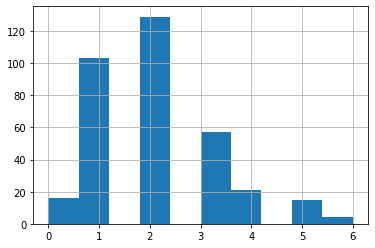

In [87]:
df_features.num_senses.hist()

In [71]:
df_features.to_csv('df_features.csv')

In [74]:
from sklearn.model_selection import train_test_split

X = df_features[['variation', 'frequency']].to_numpy()
y = df_features[['num_senses']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [84]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred))

0.8310576752009157


In [85]:
df_features['pred_num_senses'] = reg.predict(X)

In [86]:
df_features

words  variation  frequency  num_senses  pred_num_senses
0    давление   0.575461  32.750568           4         2.100021
1        дама   0.574929  83.685738           2         2.177889
2      данные   0.491390  72.661781           1         2.037122
3        дата   0.593202  21.398937           2         2.108770
4      двойка   0.545737   4.491787           1         2.012353
..        ...        ...        ...         ...              ...
340       душ   0.825656  30.884327           2         2.467740
341     замок   0.824589  82.688484           2         2.546158
342       лук   0.805795  28.050032           3         2.433945
343      суда   0.718663  43.419243           0         2.328613
344       бор   0.779355   7.708124           2         2.363367

[345 rows x 5 columns]

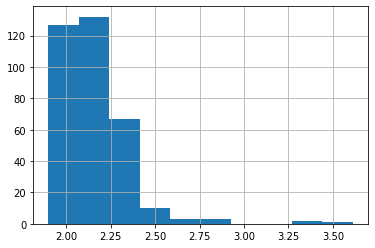

In [89]:
df_features.pred_num_senses.hist()